In [83]:
%pip install numpy matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("data/heart.csv")
df ["Heart Disease"] = df["Heart Disease"].map({ "Absence": 0, "Presence": 1})
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
COLORS = {'class0': 'tab:purple', 'class1': 'tab:green'}
LIGHT = ['#E6DAF7', '#DFF5E0']  

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def bce_loss(y_true, y_pred, eps=1e-9):
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

def train_logistic(X, y, lr=0.1, n_iters=500, l2=0.0):
    Xb = np.hstack([np.ones((X.shape[0],1)), X])
    w = np.zeros(Xb.shape[1])
    n = len(y)
    for _ in range(n_iters):
        p = sigmoid(Xb.dot(w))
        grad = Xb.T.dot(p - y) / n
        w_nb = w.copy(); w_nb[0] = 0.0
        grad += (l2 / n) * w_nb
        w -= lr * grad
    return w

def plot_pts(ax, X_train_p, X_test_p, y_train_p, y_test_p, x_idx=0, y_idx=1):
    ax.scatter(X_train_p[y_train_p==0,x_idx], X_train_p[y_train_p==0,y_idx], c=COLORS['class0'], marker='o', edgecolor='k', label='Train 0')
    ax.scatter(X_train_p[y_train_p==1,x_idx], X_train_p[y_train_p==1,y_idx], c=COLORS['class1'], marker='o', edgecolor='k', label='Train 1')
    ax.scatter(X_test_p[y_test_p==0,x_idx], X_test_p[y_test_p==0,y_idx], c=COLORS['class0'], marker='s', edgecolor='k', label='Test 0')
    ax.scatter(X_test_p[y_test_p==1,x_idx], X_test_p[y_test_p==1,y_idx], c=COLORS['class1'], marker='s', edgecolor='k', label='Test 1')

In [86]:
df = pd.read_csv("data/heart.csv")
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### Valores faltantes


In [88]:
df.isna().sum()



Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### Estadísticas descriptivas


In [89]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


### Distribución de la variable objetivo


In [90]:
target_col = "Heart Disease"

print(df[target_col].value_counts())
print("\nProporción:")
print(df[target_col].value_counts(normalize=True))


Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Proporción:
Heart Disease
Absence     0.555556
Presence    0.444444
Name: proportion, dtype: float64


### Visualización de la distribución de clases


### Distribución de la variable objetivo

Se visualiza la cantidad de pacientes con y sin enfermedad cardíaca
El dataset se encuentra relativamente balanceado lo que permite entrenar
un modelo de regresión logística sin necesidad de técnicas de balanceo adicionales


Valores únicos: [1 0]

Conteos:
 Heart Disease
0    150
1    120
Name: count, dtype: int64

Proporciones:
 Heart Disease
0    0.555556
1    0.444444
Name: proportion, dtype: float64


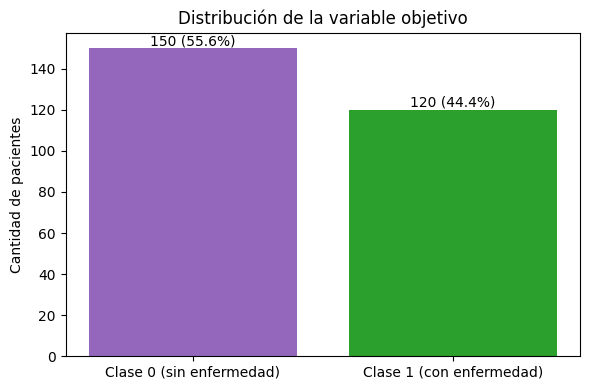

In [91]:
target_col = "Heart Disease"

df[target_col] = df[target_col].map({"Absence": 0, "Presence": 1})

counts = df[target_col].value_counts().sort_index()
props = df[target_col].value_counts(normalize=True).sort_index()

print("Valores únicos:", df[target_col].unique())
print("\nConteos:\n", counts)
print("\nProporciones:\n", props)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
classes = ['Clase 0 (sin enfermedad)', 'Clase 1 (con enfermedad)']
ax.bar([0,1], counts.values, color=[COLORS['class0'], COLORS['class1']])
ax.set_xticks([0,1])
ax.set_xticklabels(classes, rotation=0)
ax.set_ylabel('Cantidad de pacientes')
ax.set_title('Distribución de la variable objetivo')

for i, val in enumerate(counts.values):
    pct = props.values[i]*100
    ax.text(i, val + max(counts.values)*0.01, f'{val} ({pct:.1f}%)', ha='center')

plt.tight_layout()
plt.show()

### Balance de clases y justificación

- Confirmamos que 'Presence' se mapea a 1 y 'Absence' a 0.
- Mostramos los conteos y porcentajes para cada clase.

Si las proporciones resultan cercanas a 50% —es decir, no existe una clase claramente minoritaria— el dataset puede considerarse relativamente balanceado y **no es necesario aplicar técnicas de balanceo** (oversampling/undersampling) antes de entrenar un modelo de regresión logística. En caso de que la proporción fuera muy desigual (por ejemplo <30% / >70%), entonces sí deberíamos considerar balanceo o métricas y validaciones específicas.


In [92]:

selected_cols = [
    "Age",
    "BP",
    "Cholesterol",
    "Max HR",
    "ST depression",
    "Number of vessels fluro",
    "Heart Disease"  
]

data_subset = df[selected_cols].copy()
print("Dimensiones del subconjunto:", data_subset.shape)
data_subset.head(5)

Dimensiones del subconjunto: (270, 7)


,Age,BP,Cholesterol,Max HR,ST depression,Number of vessels fluro,Heart Disease
0,70,130,322,109,2.4,3,1
1,67,115,564,160,1.6,0,0
2,57,124,261,141,0.3,0,1
3,64,128,263,105,0.2,1,0
4,74,120,269,121,0.2,1,0


In [93]:

from sklearn.model_selection import train_test_split


X = data_subset.drop(columns=['Heart Disease'])
y = data_subset['Heart Disease']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print(f"Shapes: X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")

print('\nDistribución en entrenamiento:')
print(y_train.value_counts(), '\n')
print('Proporciones (train):')
print(y_train.value_counts(normalize=True).round(4))

print('\nDistribución en prueba:')
print(y_test.value_counts(), '\n')
print('Proporciones (test):')
print(y_test.value_counts(normalize=True).round(4))

Shapes: X_train=(189, 6), X_test=(81, 6), y_train=(189,), y_test=(81,)

Distribución en entrenamiento:
Heart Disease
0    105
1     84
Name: count, dtype: int64 

Proporciones (train):
Heart Disease
0    0.5556
1    0.4444
Name: proportion, dtype: float64

Distribución en prueba:
Heart Disease
0    45
1    36
Name: count, dtype: int64 

Proporciones (test):
Heart Disease
0    0.5556
1    0.4444
Name: proportion, dtype: float64


### División 70/30 — Descripción

El conjunto de datos se dividió en **70% para entrenamiento** y **30% para prueba**, manteniendo la proporción de clases (estratificación con `stratify=y`).

Propósito: evitar entrenar y evaluar con los mismos datos y simular la generalización a datos no vistos. Se usó `random_state=42` para hacer la división reproducible.

### 3.1 Función sigmoide

La función sigmoide (logística) transforma un número real en un valor entre 0 y 1 mediante la fórmula:

sigmoid(z) = 1 / (1 + exp(-z))

Esto permite interpretar la salida del modelo como una probabilidad de pertenecer a la clase positiva (presencia de enfermedad).  

**Texto corto:** “La función sigmoide permite interpretar la salida del modelo como una probabilidad de enfermedad.”

### Función de costo: Binary Cross-Entropy (BCE)

- Qué se hace: la Binary Cross-Entropy mide qué tan malas son las predicciones cuando se usan probabilidades (salida sigmoide).  
- Interpretación corta: "La función de costo Binary Cross-Entropy cuantifica el error entre las probabilidades predichas y las etiquetas reales."  

**Gráfica clave:** Costo (BCE) vs iteraciones — muestra la convergencia del entrenamiento (descenso por gradiente).

Loss inicial: 0.6931, Loss final: 0.4609


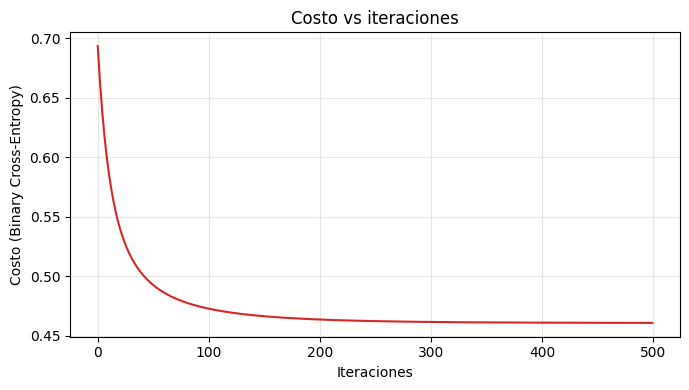

In [94]:

import numpy as np
import matplotlib.pyplot as plt


features = ["Age", "BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro"]
X = df[features].astype(float).values
y = df['Heart Disease'].astype(float).values


X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1.0
X_norm = (X - X_mean) / X_std


X_bias = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def bce_loss(y_true, y_pred):
    eps = 1e-9
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))


w = np.zeros(X_bias.shape[1])
learning_rate = 0.1
n_iters = 500
losses = []


n = len(y)
for i in range(n_iters):
    z = X_bias.dot(w)
    p = sigmoid(z)
    loss = bce_loss(y, p)
    losses.append(loss)
    grad = X_bias.T.dot(p - y) / n
    w -= learning_rate * grad

print(f"Loss inicial: {losses[0]:.4f}, Loss final: {losses[-1]:.4f}")


plt.figure(figsize=(7,4))
plt.plot(losses, color='tab:red')
plt.xlabel('Iteraciones')
plt.ylabel('Costo (Binary Cross-Entropy)')
plt.title('Costo vs iteraciones')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Gradiente descendente

- Qué se hace: el gradiente descendente actualiza los pesos y el sesgo para minimizar la función de costo (Binary Cross-Entropy).  
- Se guarda el costo en cada iteración para monitorizar la convergencia (lista `losses`).  
- Gráfica clave: curva descendente del costo (Costo vs iteraciones).  

**Texto:** “La función de costo disminuye progresivamente, indicando que el modelo converge.”

In [95]:

import numpy as np

print("Pesos finales (primeros 6):", np.round(w[:6], 4))
print(f"Sesgo (w[0]): {w[0]:.4f}")
print(f"Loss inicial: {losses[0]:.6f}")
print(f"Loss final:   {losses[-1]:.6f}")

total_decrease = losses[0] - losses[-1]
print(f"Disminución total del costo: {total_decrease:.6f}")


decreases = np.mean(np.diff(losses) <= 0)
print(f"Proporción de iteraciones con descenso en el costo: {decreases:.2%}")


if losses[-1] < losses[0]:
    print('\nLa función de costo disminuye progresivamente, indicando que el modelo converge.')
else:
    print('\nLa función de costo no muestra una disminución clara desde la primera a la última iteración; revisar hyperparámetros.')

Pesos finales (primeros 6): [-0.1558 -0.3523  0.2963  0.2432 -0.8298  0.7412]
Sesgo (w[0]): -0.1558
Loss inicial: 0.693147
Loss final:   0.460931
Disminución total del costo: 0.232216
Proporción de iteraciones con descenso en el costo: 100.00%

La función de costo disminuye progresivamente, indicando que el modelo converge.


In [96]:
features = ["Age", "BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro"]

X_test_arr = X_test[features].astype(float).values
X_test_norm = (X_test_arr - X_mean) / X_std
X_test_bias = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])

probs_test = sigmoid(X_test_bias.dot(w))
preds_test = (probs_test >= 0.5).astype(int)

print("Primeras 10 probabilidades y predicciones (umbral 0.5):")
for prob, pred in zip(probs_test[:10], preds_test[:10]):
    print(f"{prob:.3f} -> {pred}")

unique, counts = np.unique(preds_test, return_counts=True)
print("\nConteos predichos:", dict(zip(unique, counts)))

accuracy = np.mean(preds_test == y_test.values)
print(f"\nAccuracy en test (umbral 0.5): {accuracy:.4f}")

Primeras 10 probabilidades y predicciones (umbral 0.5):
0.736 -> 1
0.973 -> 1
0.143 -> 0
0.714 -> 1
0.607 -> 1
0.208 -> 0
0.948 -> 1
0.247 -> 0
0.288 -> 0
0.244 -> 0

Conteos predichos: {0: 48, 1: 33}

Accuracy en test (umbral 0.5): 0.8642


In [97]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

features = ["Age", "BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro"]


X_train_arr = X_train[features].astype(float).values
X_test_arr = X_test[features].astype(float).values
y_train_arr = y_train.values
y_test_arr = y_test.values

X_mean_train = X_train_arr.mean(axis=0)
X_std_train = X_train_arr.std(axis=0)
X_std_train[X_std_train == 0] = 1.0

X_train_norm = (X_train_arr - X_mean_train) / X_std_train
X_test_norm = (X_test_arr - X_mean_train) / X_std_train

X_train_bias = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_test_bias = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])


w_train = np.zeros(X_train_bias.shape[1])
learning_rate = 0.1
n_iters = 500

losses_train = []
for i in range(n_iters):
    z = X_train_bias.dot(w_train)
    p = sigmoid(z)
    loss = bce_loss(y_train_arr, p)
    losses_train.append(loss)
    grad = X_train_bias.T.dot(p - y_train_arr) / len(y_train_arr)
    w_train -= learning_rate * grad


probs_train = sigmoid(X_train_bias.dot(w_train))
preds_train = (probs_train >= 0.5).astype(int)
probs_test_new = sigmoid(X_test_bias.dot(w_train))
preds_test = (probs_test_new >= 0.5).astype(int)

acc_train = accuracy_score(y_train_arr, preds_train)
prec_train = precision_score(y_train_arr, preds_train, zero_division=0)
rec_train = recall_score(y_train_arr, preds_train, zero_division=0)
f1_train = f1_score(y_train_arr, preds_train, zero_division=0)

acc_test = accuracy_score(y_test_arr, preds_test)
prec_test = precision_score(y_test_arr, preds_test, zero_division=0)
rec_test = recall_score(y_test_arr, preds_test, zero_division=0)
f1_test = f1_score(y_test_arr, preds_test, zero_division=0)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_vals = [acc_train, prec_train, rec_train, f1_train]
test_vals = [acc_test, prec_test, rec_test, f1_test]

df_metrics = pd.DataFrame({'Métrica': metrics, 'Train': [round(v,4) for v in train_vals], 'Test': [round(v,4) for v in test_vals]})
print(df_metrics.to_string(index=False))


print('\nTexto sugerido: "El modelo logra un desempeño consistente entre entrenamiento y prueba, indicando buena generalización."')


diffs = [abs(t - s) for t, s in zip(train_vals, test_vals)]
if any(d > 0.05 for d in diffs):
    print('\nNota: Se observa una diferencia notable (>0.05) entre train y test en al menos una métrica; revisar sobreajuste o variabilidad.')
else:
    print('\nConfirmación: las métricas entre train y test son consistentes (diferencias ≤ 0.05).')

  Métrica  Train   Test
 Accuracy 0.7778 0.8148
Precision 0.7917 0.8000
   Recall 0.6786 0.7778
 F1-score 0.7308 0.7887

Texto sugerido: "El modelo logra un desempeño consistente entre entrenamiento y prueba, indicando buena generalización."

Nota: Se observa una diferencia notable (>0.05) entre train y test en al menos una métrica; revisar sobreajuste o variabilidad.


### FASE 5 – Visualización de fronteras de decisión

Se seleccionan pares de variables clínicas y se entrena un modelo de regresión logística usando únicamente ese par (para fines de visualización). Cada subplot muestra los puntos de entrenamiento (círculos) y prueba (cuadrados) y la frontera de decisión (probabilidad = 0.5).

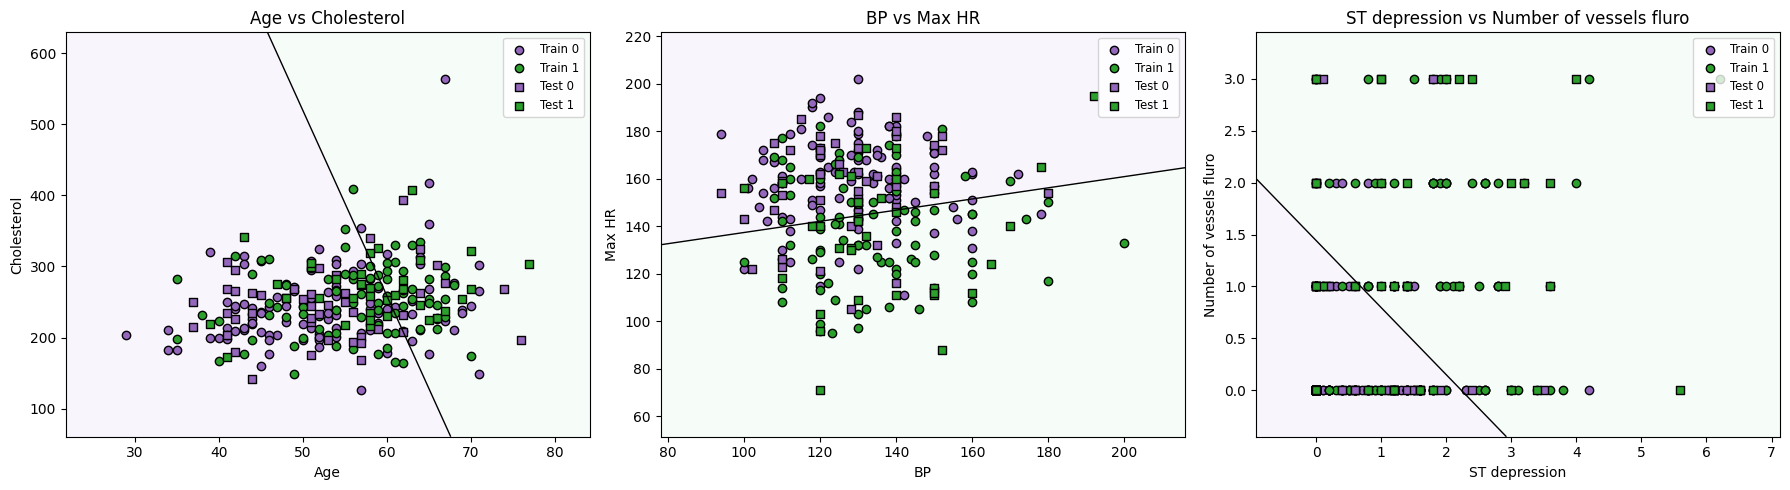

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pairs = [
    ("Age", "Cholesterol"),
    ("BP", "Max HR"),
    ("ST depression", "Number of vessels fluro")
]

fig, axes = plt.subplots(1, len(pairs), figsize=(18,5))

for ax, (x_col, y_col) in zip(axes, pairs):
    X_train_pair = X_train[[x_col, y_col]].astype(float).values
    y_train_arr = y_train.values
    X_test_pair = X_test[[x_col, y_col]].astype(float).values
    y_test_arr = y_test.values

    mean_pair = X_train_pair.mean(axis=0)
    std_pair = X_train_pair.std(axis=0)
    std_pair[std_pair == 0] = 1.0

    X_train_norm = (X_train_pair - mean_pair) / std_pair
    X_test_norm = (X_test_pair - mean_pair) / std_pair

    X_train_bias = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])

    w_pair = np.zeros(X_train_bias.shape[1])
    lr = 0.1
    n_iters = 500
    for i in range(n_iters):
        z = X_train_bias.dot(w_pair)
        p = 1/(1+np.exp(-z))
        grad = X_train_bias.T.dot(p - y_train_arr) / len(y_train_arr)
        w_pair -= lr * grad

    x_min, x_max = np.min(np.concatenate([X_train_pair[:,0], X_test_pair[:,0]])), np.max(np.concatenate([X_train_pair[:,0], X_test_pair[:,0]]))
    y_min, y_max = np.min(np.concatenate([X_train_pair[:,1], X_test_pair[:,1]])), np.max(np.concatenate([X_train_pair[:,1], X_test_pair[:,1]]))
    x_pad = (x_max - x_min) * 0.15
    y_pad = (y_max - y_min) * 0.15
    xx, yy = np.meshgrid(np.linspace(x_min - x_pad, x_max + x_pad, 300),
                         np.linspace(y_min - y_pad, y_max + y_pad, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_norm = (grid - mean_pair) / std_pair
    grid_bias = np.hstack([np.ones((grid_norm.shape[0],1)), grid_norm])
    probs = 1/(1+np.exp(-grid_bias.dot(w_pair)))
    probs = probs.reshape(xx.shape)

    cmap_light = ListedColormap(LIGHT)
    ax.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.25, cmap=cmap_light)
    cs = ax.contour(xx, yy, probs, levels=[0.5], colors='k', linewidths=1)

    plot_pts(ax, X_train_pair, X_test_pair, y_train_arr, y_test_arr, 0, 1)

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{x_col} vs {y_col}")
    ax.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

### 4.1 Predicciones — Nota

Convertimos las probabilidades predichas a etiquetas binarias usando un **umbral de 0.5**.  

Texto: "Las probabilidades predichas se convirtieron a etiquetas binarias (0/1) usando un umbral de 0.5."

### Selección de variables clínicas

- Variables seleccionadas: `Age`, `BP`, `Cholesterol`, `Max HR`, `ST depression`, `Number of vessels fluro`.
- Incluimos `Heart Disease` en el subconjunto para mantener la etiqueta al hacer visualizaciones o análisis descriptivos.

**Propósito:** reducir la complejidad del dataset, facilitar visualizaciones y preparar una base interpretable para explicar el modelo en pasos posteriores. (Sólo selección por ahora, no se entrena ningún modelo.)

### FASE 6 – Regularización (L2)

Entrenaremos la regresión logística con penalización L2 (ridge) para distintos valores de λ: **0, 0.01, 0.1, 1**.  
Objetivo: observar cómo afecta la regularización a la pérdida y al desempeño (train vs test).  

- λ = 0 → sin regularización
- λ > 0 → penaliza pesos grandes, ayuda a reducir sobreajuste

(La implementación usa descenso por gradiente con término L2 en el gradiente; no se usa sklearn para el ajuste aquí.)

 lambda  train_loss  test_loss  train_acc  test_acc
   0.00      0.4791     0.4291     0.7831    0.8148
   0.01      0.4791     0.4292     0.7831    0.8148
   0.10      0.4797     0.4298     0.7831    0.8148
   1.00      0.4851     0.4357     0.7725    0.8272


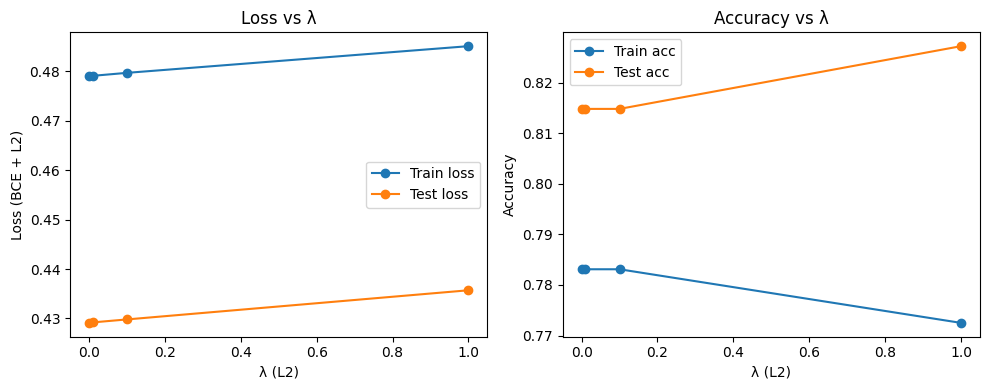

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lambdas = [0.0, 0.01, 0.1, 1.0]
results = []

features = ["Age", "BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro"]

try:
    X_train
except NameError:
    from sklearn.model_selection import train_test_split
    X = data_subset.drop(columns=['Heart Disease'])
    y = data_subset['Heart Disease']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train_arr = X_train[features].astype(float).values
X_test_arr = X_test[features].astype(float).values
y_train_arr = y_train.values.astype(float)
y_test_arr = y_test.values.astype(float)

X_mean_train = X_train_arr.mean(axis=0)
X_std_train = X_train_arr.std(axis=0)
X_std_train[X_std_train == 0] = 1.0
X_train_norm = (X_train_arr - X_mean_train) / X_std_train
X_test_norm = (X_test_arr - X_mean_train) / X_std_train

X_train_bias = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_test_bias = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])

n_train = len(y_train_arr)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def bce_loss(y_true, y_pred):
    eps = 1e-9
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

learning_rate = 0.1
n_iters = 800

for reg in lambdas:
    w_reg = np.zeros(X_train_bias.shape[1])
    losses = []
    for i in range(n_iters):
        z = X_train_bias.dot(w_reg)
        p = sigmoid(z)
        loss_bce = bce_loss(y_train_arr, p)
        w_no_bias = w_reg.copy()
        w_no_bias[0] = 0.0
        loss = loss_bce + (reg / (2 * n_train)) * np.sum(w_no_bias ** 2)
        losses.append(loss)
        grad = X_train_bias.T.dot(p - y_train_arr) / n_train
        grad += (reg / n_train) * w_no_bias
        w_reg -= learning_rate * grad

    train_probs = sigmoid(X_train_bias.dot(w_reg))
    test_probs = sigmoid(X_test_bias.dot(w_reg))
    train_loss = bce_loss(y_train_arr, train_probs) + (reg / (2 * n_train)) * np.sum(w_reg.copy()[1:] ** 2)
    test_loss = bce_loss(y_test_arr, test_probs) + (reg / (2 * n_train)) * np.sum(w_reg.copy()[1:] ** 2)

    train_pred = (train_probs >= 0.5).astype(int)
    test_pred = (test_probs >= 0.5).astype(int)
    train_acc = np.mean(train_pred == y_train_arr)
    test_acc = np.mean(test_pred == y_test_arr)

    results.append({'lambda': reg, 'train_loss': train_loss, 'test_loss': test_loss, 'train_acc': train_acc, 'test_acc': test_acc})

df_res = pd.DataFrame(results)
df_res[['train_loss','test_loss']] = df_res[['train_loss','test_loss']].round(4)
df_res[['train_acc','test_acc']] = df_res[['train_acc','test_acc']].round(4)
print(df_res.to_string(index=False))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(df_res['lambda'], df_res['train_loss'], marker='o', label='Train loss')
plt.plot(df_res['lambda'], df_res['test_loss'], marker='o', label='Test loss')
plt.xlabel('λ (L2)')
plt.ylabel('Loss (BCE + L2)')
plt.title('Loss vs λ')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_res['lambda'], df_res['train_acc'], marker='o', label='Train acc')
plt.plot(df_res['lambda'], df_res['test_acc'], marker='o', label='Test acc')
plt.xlabel('λ (L2)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs λ')
plt.legend()
plt.tight_layout()
plt.show()

 lambda  train_acc  test_acc  norm_w
   0.00     0.7831    0.8148  1.5593
   0.01     0.7831    0.8148  1.5582
   0.10     0.7831    0.8148  1.5486
   1.00     0.7725    0.8272  1.4631


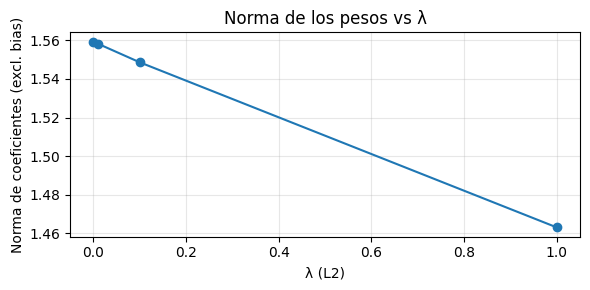

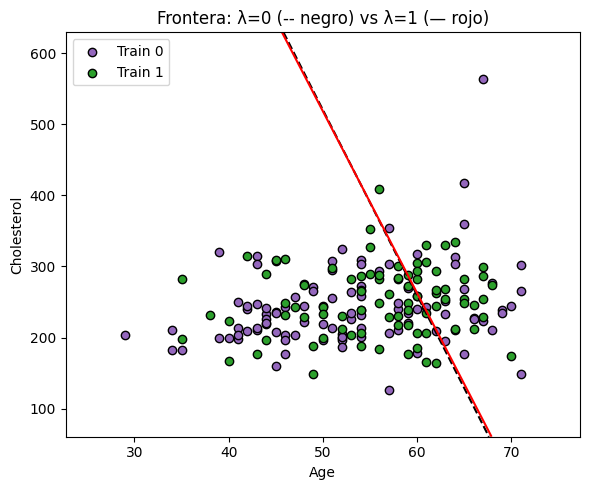


Texto sugerido: "La regularización reduce la magnitud de los coeficientes y mejora la estabilidad del modelo."


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lambdas = [0.0, 0.01, 0.1, 1.0]
records = []
weights = {}

n_train = len(y_train_arr)
for reg in lambdas:
    w_reg = np.zeros(X_train_bias.shape[1])
    for i in range(800):
        z = X_train_bias.dot(w_reg)
        p = sigmoid(z)
        grad = X_train_bias.T.dot(p - y_train_arr) / n_train
        w_nb = w_reg.copy(); w_nb[0] = 0.0
        grad += (reg / n_train) * w_nb
        w_reg -= learning_rate * grad

    weights[reg] = w_reg.copy()
    train_probs = sigmoid(X_train_bias.dot(w_reg))
    test_probs = sigmoid(X_test_bias.dot(w_reg))
    train_pred = (train_probs >= 0.5).astype(int)
    test_pred = (test_probs >= 0.5).astype(int)
    train_acc = np.mean(train_pred == y_train_arr)
    test_acc = np.mean(test_pred == y_test_arr)
    norm_w = np.linalg.norm(w_reg[1:])
    records.append({'lambda': reg, 'train_acc': round(train_acc,4), 'test_acc': round(test_acc,4), 'norm_w': round(norm_w,4)})

df_comp = pd.DataFrame(records)
print(df_comp.to_string(index=False))

plt.figure(figsize=(6,3))
plt.plot(df_comp['lambda'], df_comp['norm_w'], marker='o')
plt.xlabel('λ (L2)')
plt.ylabel('Norma de coeficientes (excl. bias)')
plt.title('Norma de los pesos vs λ')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

x_col, y_col = 'Age', 'Cholesterol'
X_train_pair = X_train[[x_col, y_col]].astype(float).values
y_train_pair = y_train.values
mean_pair = X_train_pair.mean(axis=0)
std_pair = X_train_pair.std(axis=0)
std_pair[std_pair == 0] = 1.0
X_train_norm_pair = (X_train_pair - mean_pair) / std_pair
X_train_bias_pair = np.hstack([np.ones((X_train_norm_pair.shape[0], 1)), X_train_norm_pair])


def train_2d(reg, n_iters=800, lr=0.1):
    w_p = np.zeros(X_train_bias_pair.shape[1])
    for _ in range(n_iters):
        z = X_train_bias_pair.dot(w_p)
        p = sigmoid(z)
        grad = X_train_bias_pair.T.dot(p - y_train_pair) / len(y_train_pair)
        w_nb = w_p.copy(); w_nb[0] = 0.0
        grad += (reg / len(y_train_pair)) * w_nb
        w_p -= lr * grad
    return w_p

w0 = train_2d(0.0)
w1 = train_2d(1.0)


x_min, x_max = np.min(X_train_pair[:,0]), np.max(X_train_pair[:,0])
y_min, y_max = np.min(X_train_pair[:,1]), np.max(X_train_pair[:,1])
x_pad = (x_max - x_min) * 0.15
y_pad = (y_max - y_min) * 0.15
xx, yy = np.meshgrid(np.linspace(x_min - x_pad, x_max + x_pad, 300),
                     np.linspace(y_min - y_pad, y_max + y_pad, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_norm = (grid - mean_pair) / std_pair
grid_bias = np.hstack([np.ones((grid_norm.shape[0],1)), grid_norm])
probs0 = sigmoid(grid_bias.dot(w0)).reshape(xx.shape)
probs1 = sigmoid(grid_bias.dot(w1)).reshape(xx.shape)

plt.figure(figsize=(6,5))

cs0 = plt.contour(xx, yy, probs0, levels=[0.5], colors='k', linestyles='--')
cs1 = plt.contour(xx, yy, probs1, levels=[0.5], colors='red', linestyles='-')


plt.scatter(X_train_pair[y_train_pair==0,0], X_train_pair[y_train_pair==0,1], c=COLORS['class0'], marker='o', edgecolor='k', label='Train 0')
plt.scatter(X_train_pair[y_train_pair==1,0], X_train_pair[y_train_pair==1,1], c=COLORS['class1'], marker='o', edgecolor='k', label='Train 1')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Frontera: λ=0 (-- negro) vs λ=1 (— rojo)')
plt.legend()
plt.tight_layout()
plt.show()

print('\nTexto sugerido: "La regularización reduce la magnitud de los coeficientes y mejora la estabilidad del modelo."')